In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
df=pd.read_csv('Desktop/scoring.csv')
df

,Unnamed: 0,id_PEP,PEP01,PEP02,PEP03_avto,PEP03_home,PEP03_land,PEP04_adress,PEP04_region,PEP05,...,PEP22,PEP23,PEP24,PEP25,PEP26,PEP27,PEP07,score,final_score,risk
0,0,9944,1,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,2.1,3.44,mid
1,1,6179,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.16,low
2,2,702,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.16,low
3,3,9970,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.8,1.31,low
4,4,6126,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.16,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,9496,26254,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.7,1.15,low
9497,9497,26078,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.7,1.15,low
9498,9498,47966,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.9,1.48,low
9499,9499,33880,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.9,1.48,low


In [56]:
X=df.drop(columns=['id_PEP','score', 'final_score', 'risk'], axis=1)
y=df['score']
y1=df['final_score']
y2=df['risk']

In [61]:
y.dtype

dtype('float64')

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [64]:
model.fit(X, y1)

LinearRegression()

In [65]:
model.coef_

array([2.85948103e-07, 1.64815777e-01, 6.57267216e-01, 6.58164419e-01,
       1.64379720e-01, 1.63887266e-01, 1.14924012e+00, 1.62937373e-01,
       6.58491376e-01, 8.20507735e-01, 3.29034523e-01, 3.28470769e-01,
       1.14762749e+00, 1.31204623e+00, 1.63990880e+00, 1.31236661e+00,
       6.57387519e-01, 9.82873758e-01, 1.31158729e+00, 1.63929422e+00,
       1.31145272e+00, 8.19808419e-01, 1.63942254e+00, 1.14767844e+00,
       1.47550739e+00, 4.90729184e-01, 0.00000000e+00])

In [66]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y2, random_state = 1)

In [67]:
from sklearn.model_selection import KFold, cross_validate
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

In [16]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [17]:
model.fit(Xtrain, ytrain)

GaussianNB()

In [18]:
y_model=model.predict(Xtest)

In [19]:
model.score(Xtest, ytest)

0.9128787878787878

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
mat = confusion_matrix(ytest, y_model)
mat

array([[   7,    0,    2],
       [   2, 1953,  126],
       [  12,   65,  209]])

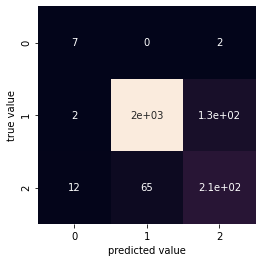

In [22]:
sns.heatmap(mat, square=True, annot=True, cbar = False)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [23]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model1 = KNeighborsClassifier(n_neighbors = 12)

In [25]:
model1.fit(Xtrain, ytrain)
y_model1=model1.predict(Xtest)
model1.score(Xtest, ytest)

0.8863636363636364

In [69]:
cv_results=cross_validate(model1, X, y2, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.10296297, 0.08927298, 0.09323621, 0.10404992, 0.09716296]),
 'score_time': array([0.05379295, 0.05174708, 0.06304073, 0.06112409, 0.05370975]),
 'test_score': array([0.88427144, 0.87789474, 0.87421053, 0.88789474, 0.88315789])}

In [26]:
mat1 = confusion_matrix(ytest, y_model1)
mat1

array([[   0,    9,    0],
       [   0, 2037,   44],
       [   0,  217,   69]])

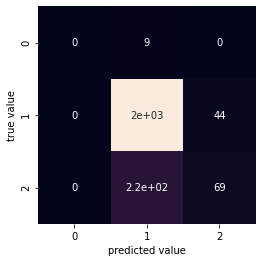

In [27]:
sns.heatmap(mat1, square=True, annot=True, cbar = False)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [28]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dtr=DecisionTreeRegressor(max_depth = 12)
X1train, X1test, y1train, y1test = train_test_split(X, y1, random_state = 1)

In [29]:
dtr.fit(X1train, y1train)

DecisionTreeRegressor(max_depth=12)

In [30]:
y_dtr=dtr.predict(X1test)

In [70]:
cv_results=cross_validate(dtr, X, y1, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.02101302, 0.01836491, 0.01547861, 0.01531005, 0.01661181]),
 'score_time': array([0.00491166, 0.00230813, 0.00188637, 0.00186706, 0.0018611 ]),
 'test_score': array([0.96228508, 0.95338103, 0.95745648, 0.95712074, 0.95916254])}

In [31]:
dtr.score(X1test, y1test)

0.9534731468496402

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
dt_y=dt.predict(Xtest)
dt.score(Xtest, ytest)

0.984006734006734

In [54]:
cv_results=cross_validate(dt, X, y2, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.03053093, 0.02504396, 0.01973701, 0.01942611, 0.0180552 ]),
 'score_time': array([0.00639105, 0.00358987, 0.00321579, 0.00275397, 0.00330973]),
 'test_score': array([0.98421883, 0.98526316, 0.98736842, 0.98      , 0.98368421])}

In [43]:
mat_dt = confusion_matrix(ytest, dt_y)
mat_dt

array([[   1,    0,    8],
       [   0, 2076,    5],
       [   6,   19,  261]])

In [45]:
from sklearn.ensemble import AdaBoostClassifier
Adb = AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=1)

# train AdaBoost on our data
np.random.seed(1111)
Adb.fit(Xtrain, ytrain)
adb_y=Adb.predict(Xtest)

In [46]:
Adb.score(Xtest, ytest)

0.9255050505050505

In [47]:
mat_adb = confusion_matrix(ytest, adb_y)
mat_adb

array([[   0,    0,    9],
       [   0, 2018,   63],
       [   0,  105,  181]])

In [55]:
cv_results=cross_validate(Adb, X, y2, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.04842067, 0.03181982, 0.0289669 , 0.02981997, 0.03110313]),
 'score_time': array([0.00532722, 0.00351501, 0.00350213, 0.00454283, 0.00421381]),
 'test_score': array([0.93161494, 0.92315789, 0.92473684, 0.93526316, 0.93      ])}

In [95]:
#idea to use clasters 
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3, linkage = 'single').fit(X)
X['clusters'] = clustering.labels_
X['clusters'] = X['clusters'].astype('category')

In [97]:
X['clusters']

0       0
1       0
2       0
3       0
4       0
       ..
9496    1
9497    1
9498    1
9499    1
9500    1
Name: clusters, Length: 9501, dtype: category
Categories (3, int64): [0, 1, 2]